In [1]:
#包版本
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))


import random
import time



import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 1.3.2
matplotlib version: 3.0.2
NumPy version: 1.19.2
SciPy version: 1.4.1
IPython version: 7.2.0
scikit-learn version: 0.24.2
-------------------------


In [2]:
#模型
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#设置绘图参数

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
data_raw = pd.read_csv('xjtx_info_20210913.csv',error_bad_lines=False,
                       engine='python',
                       header=None,encoding='gb2312')
data1 = data_raw.copy(deep = True)

print (data_raw.info()) 
data_raw.sample(10)

print (data1.info()) 
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114926 entries, 0 to 114925
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       114926 non-null  int64  
 1   1       114926 non-null  object 
 2   2       114926 non-null  int64  
 3   3       114926 non-null  int64  
 4   4       114926 non-null  int64  
 5   5       0 non-null       float64
 6   6       92019 non-null   float64
 7   7       114926 non-null  object 
 8   8       114926 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 7.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114926 entries, 0 to 114925
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       114926 non-null  int64  
 1   1       114926 non-null  object 
 2   2       114926 non-null  int64  
 3   3       114926 non-null  int64  
 4   4       114926 non-null  int64  
 5   5       0 non-null      

,0,1,2,3,4,5,6,7,8
33469,34114,木星,7,1,323,NaN,2525.0,2021/8/4 05:22:55,1
5061,5706,天王星,2,7,714,NaN,44635.0,2021/7/15 11:53:55,1
43865,44510,土星,1,3,640,NaN,54575.0,2021/8/11 10:39:55,1
65541,66186,水星,8,0,736,NaN,14970.0,2021/8/26 12:15:55,1
68872,69517,土星,1,5,1187,NaN,13330.0,2021/8/28 19:46:55,1
82655,83300,木星,7,2,1000,NaN,44360.0,2021/9/2 16:39:55,1
26960,27605,天王星,2,9,1013,NaN,57215.0,2021/7/30 16:52:55,1
107494,108139,木星,7,2,462,NaN,35080.0,2021/9/11 07:41:55,1
113444,114089,土星,1,2,557,NaN,NaN,2021/9/13 09:16:55,2
90834,91479,木星,7,1,772,NaN,NaN,2021/9/5 12:51:55,2


In [4]:
data1_x = data1[3]
data1_y = data1[1]

# print (data1_y.info())

# #基本数据处理
# data1_x.rename(columns={2:'A',3:'B',4:'C',
#                        6:'D',8:'E'},inplace=True)
data1_x.fillna(data1_x.median(), inplace = True)

data1_x = data1_x.astype(int)

data1_x.head(10)


0    18
1     3
2     5
3     3
4     3
5     2
6     4
7     4
8     1
9     2
Name: 3, dtype: int64

In [5]:
data1_y.value_counts()

火星     22430
木星     22401
水星     22279
金星     22256
土星     11065
天王星     7561
海王星     4504
开普勒     2430
Name: 1, dtype: int64

In [6]:
data1_y.replace([u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"] 
                , [1,2,3,4,5,6,7,8] , inplace=True)
data1_y=data1_y.astype(int)
data1_y.value_counts()

4    22430
2    22401
3    22279
1    22256
5    11065
6     7561
7     4504
8     2430
Name: 1, dtype: int64

In [7]:
# 切分数据
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1_x, data1_y, random_state = 0)
data1_x = pd.DataFrame(data1_x)
data1_y = pd.DataFrame(data1_y)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

Data1 Shape: (114926, 9)
Train1 Shape: (86194,)
Test1 Shape: (28732,)


In [20]:
MLA = [
    #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(), 
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
#     ensemble.RandomForestClassifier(),

#     #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
#     #GLM
#     linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
# #     #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
#     neighbors.KNeighborsClassifier(),
    
    #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
# #     Trees    
#     tree.DecisionTreeClassifier(),0.25
#     tree.ExtraTreeClassifier(),
    
#     #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
# #     xgboost: http://xgboost.readthedocs.io/en/latest/model.html
#     XGBClassifier()    
    ]
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1_y.iloc[:10000,]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    

    cv_results = model_selection.cross_validate(alg, data1_x.iloc[:10000,], data1_y.iloc[:10000,],
                                                cv  = cv_split,return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    
    alg.fit(data1_x.iloc[:10000,].values.reshape(-1,1), data1_y.iloc[:10000,])
    MLA_predict[MLA_name] = alg.predict(data1_x.iloc[:10000,].values.reshape(-1,1))
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.2736,0.255833,0.018375,0.038793


Text(0, 0.5, 'Algorithm')

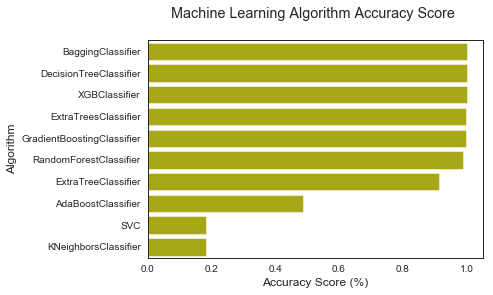

In [15]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'y')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [19]:
#将参数存入txt
MLA_compare['MLA Parameters'].to_csv('para.txt', sep='\t',index=True, header=None)

In [44]:
data_vali = pd.read_csv('16-23.csv',error_bad_lines=False,
                       engine='python',
                       encoding='gb2312')
data_vali = pd.DataFrame(data_vali)
datav_x = data_vali['中奖人数']
datav_y = data_vali['开奖星球']

datav_y.replace([u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"] 
                , [1,2,3,4,5,6,7,8] , inplace=True)
datav_y=datav_y.astype(int)

Index(['ID', '开奖星球', '开奖星球代码', '中奖人数', '期数', '开奖时间', '类型：1-听听看看 2-派对'], dtype='object')

In [43]:
#选取的5个模型为：bagging、DecisionTree、XGB、ExtraTree、GDBoosting
vote_est = [
    ('bc', ensemble.BaggingClassifier(base_estimator= None, bootstrap= True, bootstrap_features= False, max_features= 1.0, max_samples= 1.0, n_estimators= 10, n_jobs= None, oob_score= False, random_state= None, verbose= 0, warm_start= False)),
    ('dt',tree.DecisionTreeClassifier(ccp_alpha= 0.0, class_weight= None, max_depth= None, max_features= None, max_leaf_nodes= None, min_impurity_decrease= 0.0, min_impurity_split= None, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, random_state= None, splitter= 'best')),
#     ('xgb', XGBClassifier()),
#     ('etc',ensemble.ExtraTreesClassifier(bootstrap= False, ccp_alpha= 0.0, class_weight= None, max_depth= None, max_features= 'auto', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_impurity_split= None, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, n_estimators= 100, n_jobs= None, oob_score= False, random_state= None, verbose= 0, warm_start= False)),
    ('gbc', ensemble.GradientBoostingClassifier(ccp_alpha= 0.0, criterion= 'friedman_mse', init= None, learning_rate= 0.1, loss= 'deviance', max_depth= 3, max_features= None, max_leaf_nodes= None, min_impurity_decrease= 0.0, min_impurity_split= None, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, n_estimators= 100, n_iter_no_change= None, random_state= None, subsample= 1.0, tol= 0.0001, validation_fraction= 0.1, verbose= 0, warm_start= False)),
]
     
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1_x.iloc[:10000], data1_y.iloc[:10000], cv  = cv_split,return_train_score=True)
vote_hard.fit(data1_x.iloc[:10000], data1_y.iloc[:10000])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Hard Voting Training w/bin score mean: 27.42
Hard Voting Test w/bin score mean: 25.54
Hard Voting Test w/bin score 3*std: +/- 2.42
----------


In [56]:
#包版本
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
from sklearn import model_selection

data_vali = pd.read_csv('16-23.csv',
                       error_bad_lines=False,
                       engine='python',
                       encoding='gb2312')
data_vali = pd.DataFrame(data_vali)
datav_x = data_vali['中奖人数']
datav_y = data_vali['开奖星球']

datav_y.replace([u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"] 
                , [1,2,3,4,5,6,7,8] , inplace=True)
datav_y=datav_y.astype(int)

clf = ensemble.BaggingClassifier()
clf_cv = model_selection.cross_validate(clf, datav_x, datav_y, cv  = cv_split,return_train_score=True)

clf.fit(datav_x.values.reshape(-1,1), datav_y)
print(" Training w/bin score mean: {:.2f}". format(clf_cv['train_score'].mean()*100)) 
print(" Test w/bin score mean: {:.2f}". format(clf_cv['test_score'].mean()*100))
content=clf.predict_proba(datav_x.iloc[:10].values.reshape(-1,1))

# print(content)
content =  np.array(content)
content = np.argsort(-content) # 逆序输出
y_raw = content[:,:3]
# print (np.argsort(-content)) # 逆序输出
y_raw = pd.DataFrame(y_raw)
y_raw.replace( [1,2,3,4,5,6,7,8],
               [u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"],inplace=True)
print("前十个变量的参考预测为：{}".format(y_raw))

#预测新的数据
submit = y_raw
submit.to_csv("submit.csv", index=True)
submit.replace( [1,2,3,4,5,6,7,8],
               [u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"],inplace=True)
submit.head(10)

 Training w/bin score mean: nan
 Test w/bin score mean: nan
前十个变量的参考预测为：    0   1   2
0  木星  金星  水星
1  木星   0  火星
2  木星  金星  水星
3  水星  金星   0
4  木星  金星  水星
5  木星   0  火星
6  木星  金星  水星
7   0  水星  金星
8   0  水星  金星
9  木星  金星  水星


,0,1,2
0,木星,金星,水星
1,木星,0,火星
2,木星,金星,水星
3,水星,金星,0
4,木星,金星,水星
5,木星,0,火星
6,木星,金星,水星
7,0,水星,金星
8,0,水星,金星
9,木星,金星,水星


In [31]:
content =  np.array(content)
content = np.argsort(-content) # 逆序输出
y_raw = content[:,:3]
# print (np.argsort(-content)) # 逆序输出
y_raw = pd.DataFrame(y_raw)
y_raw.replace( [1,2,3,4,5,6,7,8],
               [u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"],inplace=True)
print(y_raw)

     0    1   2
0   木星   金星   0
1  海王星  天王星  土星
2  海王星  天王星  土星
3  海王星  天王星  土星
4  海王星  天王星  土星
5  海王星  天王星  土星
6  天王星  海王星  土星
7  天王星  海王星  土星
8  海王星  天王星  土星
9  海王星  天王星  土星


In [38]:
data_val['planet'] = vote_hard.predict(data1_x[-11:-1])

#预测新的数据
submit = data_val['planet']
submit.to_csv("submit.csv", index=True)
submit.replace( [1,2,3,4,5,6,7,8],
               [u"金星",u"木星",u"水星",
                 u"火星",u"土星",u"天王星",u"海王星",
                u"开普勒"],inplace=True)
print('Validation Data Distribution: \n', data_val['planet'].value_counts(normalize = True))
submit.sample(10)

Validation Data Distribution: 
 天王星    0.4
木星     0.3
火星     0.1
金星     0.1
土星     0.1
Name: planet, dtype: float64


114917     木星
114918    天王星
114923     土星
114920    天王星
114922     金星
114916     火星
114919    天王星
114921     木星
114915    天王星
114924     木星
Name: planet, dtype: object

In [46]:
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, datav_x , datav_y , cv  = cv_split,return_train_score=True)

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 100.00
Hard Voting Test w/bin score mean: 100.00
Hard Voting Test w/bin score 3*std: +/- 0.00
----------
